In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
# %load_ext autoreload
# %autoreload 2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x6me4u58 because the default path (/home/mason/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
class Diffusion_debug_test(spatialpy.Model):

    def __init__(self, model_name="diffusion_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.01

        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        B = spatialpy.Species(name="B", diffusion_constant=D_const)
        self.add_species([A, B])

        self.domain = spatialpy.Domain.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1.0, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 1000, [0,0,0]))

        self.timestep_size=.1
        self.num_timesteps=10
        self.output_freq=1

In [3]:
model = Diffusion_debug_test()

In [4]:
from spatialpy import Solver
import filecmp
sol = Solver(model, debug_level=0)
sol.compile()
result = sol.run()

In [5]:
result2 = sol.run()

In [7]:
filecmp.cmpfiles.__defaults__ = (False,)
dircmp = filecmp.dircmp(result.result_dir, result2.result_dir)
print(dircmp.report_full_closure())
print(dircmp.diff_files)
print(dircmp.left_only)
print(dircmp.right_only)
print(result == result2)

diff /tmp/spatialpy_result_1jdp1d1n /tmp/spatialpy_result_kei64i4w
Identical files : ['output0.vtk', 'output0_boundingBox.vtk']
Differing files : ['output1.vtk', 'output10.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
None
['output1.vtk', 'output10.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
[]
[]
False


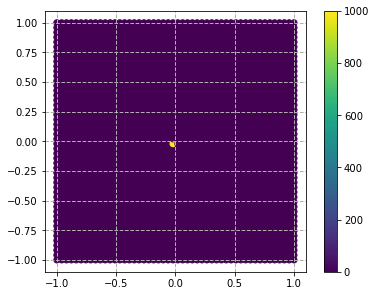

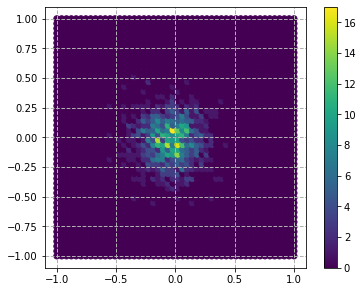

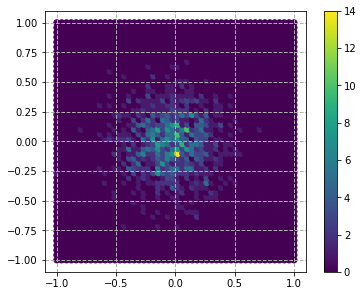

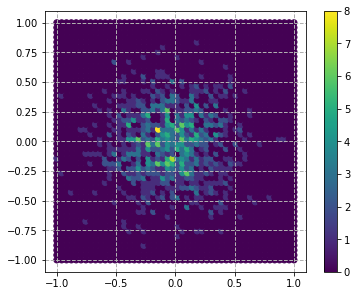

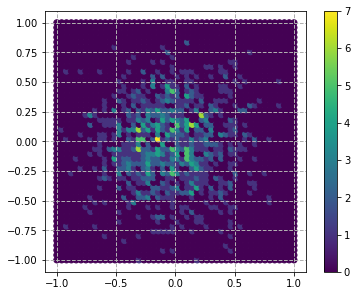

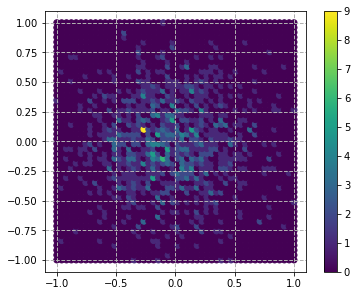

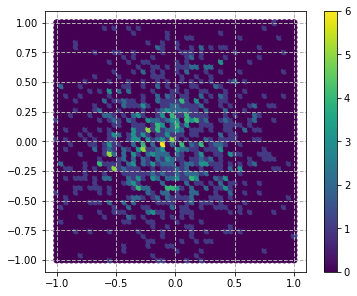

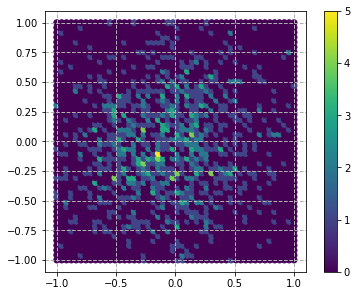

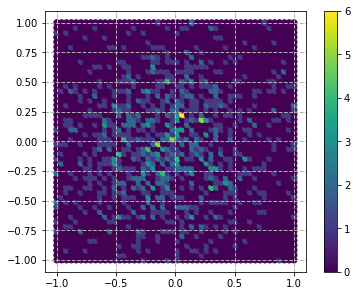

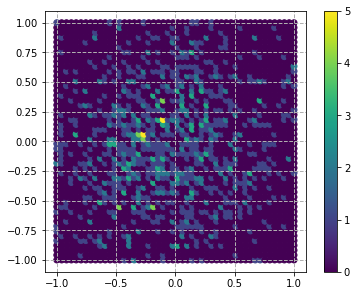

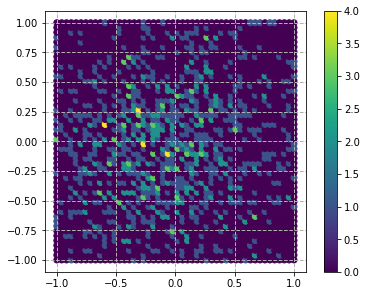

In [8]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("A", i, use_matplotlib=True)

In [9]:
import numpy as np

In [10]:
def binit(x, y, y2=None):
    # sqrt(x^2+y^2)
    bins = sorted(list(set(x)))
    bin_values = np.zeros(50)
    if y2 is not None:
        y = np.sqrt(y**2+y2**2)
    for i, v in enumerate(y):
        for j, b in enumerate(bins):
            if x[i] == b:
    #             print('found ', b, ' at index ', i)
                bin_values[j] += v
    return bins, bin_values

2500
[0. 0. 0. ... 0. 0. 0.]
2500
[0. 0. 0. ... 0. 0. 0.]


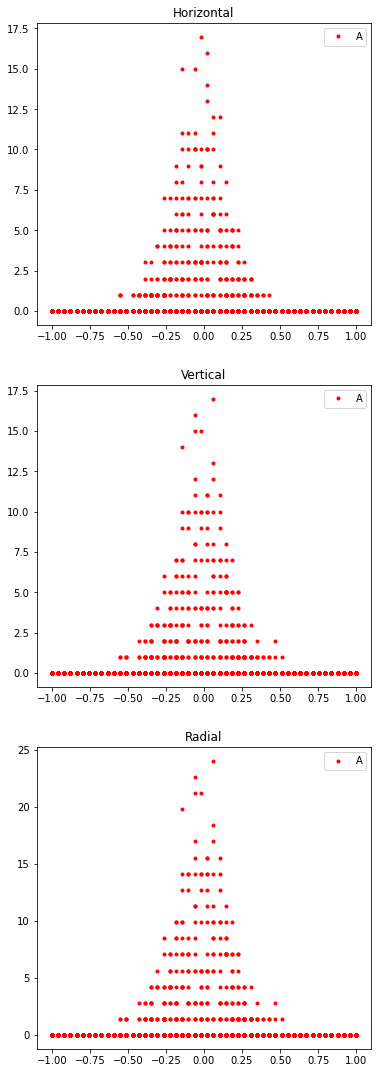

In [11]:

hx_vals = model.domain.coordinates()[:, 0]
hA_vals = result.get_species("A", timepoints=10, concentration=False, debug=False)
vx_vals = model.domain.coordinates()[:, 1]
vA_vals = result.get_species("A", timepoints=10, concentration=False, debug=False)
print(len(hA_vals))
print(hA_vals)
print(len(vA_vals))
print(vA_vals)

plt.figure(figsize=(6,6))
plt.subplots_adjust(top=2.5)
plt.subplot(3,1,1)
plt.title('Horizontal')

plt.plot(hx_vals,hA_vals,'.r', 
#         (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (1 - mu)**2 / (2 * sigma**2) )), '.g'
        )
plt.legend(['A'],loc='best')

plt.subplot(3,1,2)
plt.title('Vertical')

plt.plot(vx_vals,vA_vals,'.r')
plt.legend(['A'],loc='best')

plt.subplot(3,1,3)
plt.title('Radial')

plt.plot(vx_vals, np.sqrt(vA_vals**2+hA_vals**2), '.r')
plt.legend(['A'],loc='best')

In [12]:
dist_and_count = dict(zip(hx_vals, hA_vals))
print(len(hx_vals))
print(len(hA_vals))

2500
2500


In [13]:
hbins, hbin_values = binit(hx_vals, hA_vals)
vbins, vbin_values = binit(vx_vals, vA_vals)
rbins, rbin_values = binit(hx_vals, hA_vals, vA_vals)

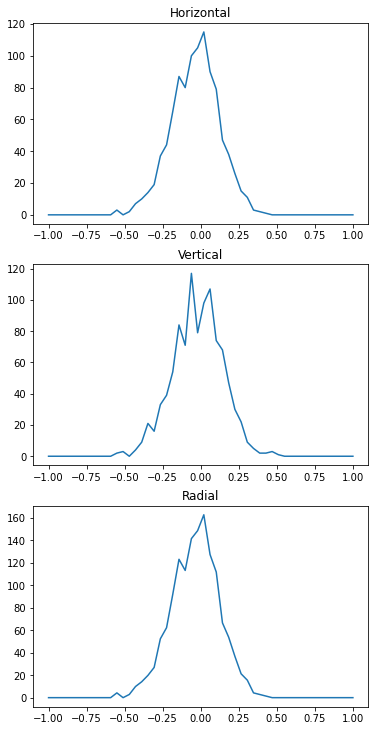

In [14]:
plt.subplot(3, 1, 1)
plt.title('Horizontal')
plt.plot(hbins, hbin_values)
plt.subplot(3, 1, 2)
plt.title('Vertical')
plt.plot(vbins, vbin_values)
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 3)
plt.title('Radial')
plt.plot(rbins, rbin_values)

In [15]:
def countit(x, y, y2=None):
    counts = []
    if y2 is not None:
        y = np.sqrt(y**2+y2**2)
    for i in range(len(x)):
        j = 0
        while j < y[i]:
            counts.append(hx_vals[i])
            j += 1
    return counts

(array([  6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,  14.,   0.,   0.,   0.,  18.,   0.,   0.,   0.,  26.,   0.,
          0.,   0.,   0.,  32.,   0.,   0.,   0.,  61.,   0.,   0.,   0.,
         68.,   0.,   0.,   0., 100.,   0.,   0.,   0., 132.,   0.,   0.,
          0., 122.,   0.,   0.,   0.,   0., 152.,   0.,   0.,   0., 160.,
          0.,   0.,   0., 174.,   0.,   0.,   0., 135.,   0.,   0.,   0.,
        121.,   0.,   0.,   0.,  76.,   0.,   0.,   0.,   0.,  61.,   0.,
          0.,   0.,  42.,   0.,   0.,   0.,  26.,   0.,   0.,   0.,  19.,
          0.,   0.,   0.,   6.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,
          2.]),
 array([-0.55102041, -0.54122449, -0.53142857, -0.52163265, -0.51183673,
        -0.50204082, -0.4922449 , -0.48244898, -0.47265306, -0.46285714,
        -0.45306122, -0.44326531, -0.43346939, -0.42367347, -0.41387755,
        -0.40408163, -0.39428571, -0.3844898 , -0.37469388, -0.36489796,
        -0.35510204, -0.34

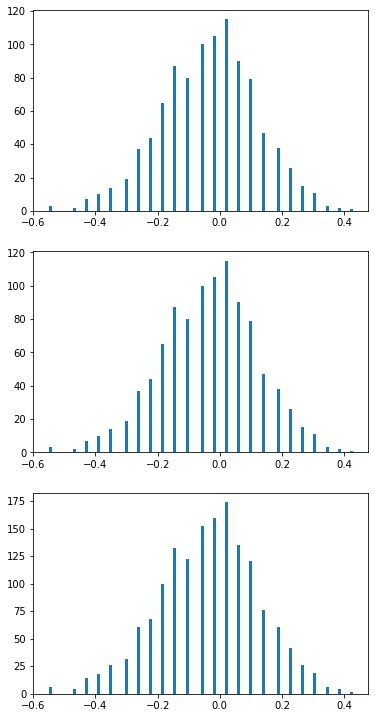

In [16]:
hcounts = countit(hx_vals, hA_vals)
vcounts = countit(vx_vals, vA_vals)
rcounts = countit(hx_vals, hA_vals, vA_vals)

plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.hist(hcounts, bins=100)
plt.subplot(3, 1, 2)
plt.hist(vcounts, bins=100)
plt.subplot(3, 1, 3)
plt.hist(rcounts, bins=100)